# SHARPE RATIO COMPARISON ON SAME ASSET CLASS
In this projecct i'm tying to find out the risk of each assets and returns that they are generating and then comparing them through __sharpe ratio__.

# import libraries

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np


# Load tickers data

In [2]:
#STOCK DATA OF TATAMOTORS AND TVSMOTORS FROM JAN 2021 TILL OCT 2021
stock_data = yf.download(['TATAMOTORS.NS', 'TVSMOTOR.NS'], start = '2021-01-01', end = '2021-11-01')
#drop null values and choose adjusted close price for further analysis
df_stocks = stock_data['Adj Close'].dropna()
df_stocks


[*********************100%***********************]  2 of 2 completed


,TATAMOTORS.NS,TVSMOTOR.NS
Date,,
2021-01-01,186.500000,487.951782
2021-01-04,191.300003,492.625000
2021-01-05,193.199997,488.896393
2021-01-06,195.399994,485.366608
2021-01-07,196.750000,496.453033
...,...,...
2021-10-25,479.899994,599.500000
2021-10-26,508.649994,625.900024
2021-10-27,497.899994,625.849976


TATAMOTORS.NS    float64
TVSMOTOR.NS      float64
dtype: object

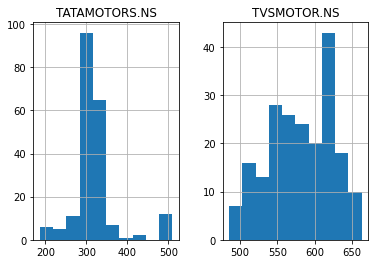

In [7]:
#Show structure of data
df_stocks.hist()
#describe about data
df_stocks.describe()
#data structure of data
df_stocks.dtypes

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

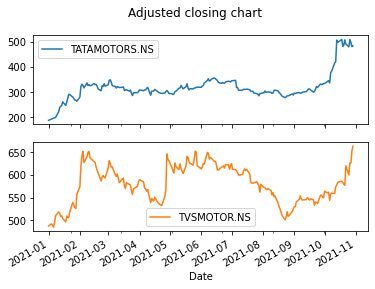

In [8]:
# visualize the stocks data
df_stocks.plot(title = 'Adjusted closing chart', subplots= True)

In [9]:
#Returns of both stocks 
stock_returns = df_stocks.pct_change().dropna()
stock_returns.describe()


,TATAMOTORS.NS,TVSMOTOR.NS
count,204.000000,204.000000
mean,0.005225,0.001724
std,0.033631,0.021452
min,-0.099466,-0.051232
25%,-0.011892,-0.009299
50%,0.003186,-0.002002
75%,0.016472,0.011708
max,0.204467,0.140385


In [17]:
#NIFTY50 DATA FROM JAN 2021 TILL OCT 2020
Benchmark_data = yf.download('^NSEI', start = '2021-01-01', end= '2021-11-01')
df_benchmrk= Benchmark_data['Adj Close'].dropna()
df_benchmrk.head(5)
    

[*********************100%***********************]  1 of 1 completed


Date
2021-01-01    14018.500000
2021-01-04    14132.900391
2021-01-05    14199.500000
2021-01-06    14146.250000
2021-01-07    14137.349609
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

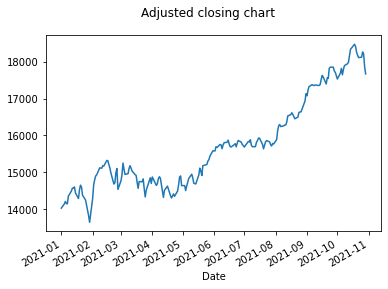

In [11]:
# visualize the stocks data
df_benchmrk.plot(title = 'Adjusted closing chart', subplots= True)

In [19]:
#Returns of both stocks 
stock_returns = df_stocks.pct_change().dropna()
stock_returns.describe()


,TATAMOTORS.NS,TVSMOTOR.NS
count,204.000000,204.000000
mean,0.005225,0.001724
std,0.033631,0.021452
min,-0.099466,-0.051232
25%,-0.011892,-0.009299
50%,0.003186,-0.002002
75%,0.016472,0.011708
max,0.204467,0.140385


In [20]:
#benchmark returns
benchmrk_returns = df_benchmrk.pct_change().dropna()
benchmrk_returns.describe()


count    204.000000
mean       0.001183
std        0.009770
min       -0.037636
25%       -0.003860
50%        0.001384
75%        0.007444
max        0.047424
Name: Adj Close, dtype: float64

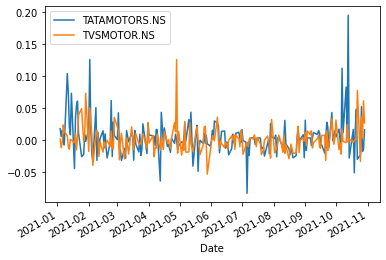

In [22]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(benchmrk_returns, axis = 0)

# plot the excess_returns
excess_returns.plot();

In [23]:
# summarize the excess_returns
excess_returns.describe()

,TATAMOTORS.NS,TVSMOTOR.NS
count,204.000000,204.000000
mean,0.004042,0.000541
std,0.029811,0.020313
min,-0.083352,-0.053505
25%,-0.012745,-0.012543
50%,0.001107,-0.001578
75%,0.014497,0.008075
max,0.195030,0.125951


In [24]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()
avg_excess_return


TATAMOTORS.NS    0.004042
TVSMOTOR.NS      0.000541
dtype: float64

In [25]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()


array([<AxesSubplot:>], dtype=object)

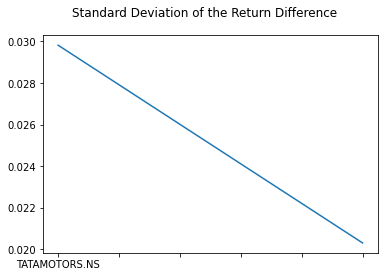

In [26]:
# plot the standard deviations
sd_excess_return.plot(title= 'Standard Deviation of the Return Difference', subplots = True)


In [28]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return, axis = 0)
# annualize the sharpe ratio
annual_factor = np.sqrt(205)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor, axis = 0)

TATAMOTORS.NS    1.941163
TVSMOTOR.NS      0.381017
dtype: float64

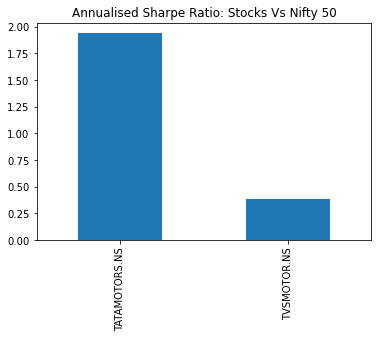

In [30]:
# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title = 'Annualised Sharpe Ratio: Stocks Vs Nifty 50');
annual_sharpe_ratio

# CONCLUSION -
'''We have concluded that sharpe ratio of TATAMOTORS is six times more than of the TVSMOTORS This means that an investment in TATAMOTORS returned six times as much compared to the NIFTY 50 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in TATAMOTORS would have been more attractive. When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.'''
